### Illustrative example for comparing "topic distribution over the years" between two graphlets 

In [1]:
import numpy as np
import pickle
from scipy import stats
import matplotlib.pyplot as plt
from pandas import DataFrame
from typing import Tuple, List, Union, Any
import pandas as pd

In [2]:
path = '/Users/nagaraj/Desktop/author-name-disambiguation-using-mcmc/data/input/unified-and-dataset_1_filtered/meta_data/'
with open(path + 'topic_distributions.pickle', 'rb') as handle:
    topic_distributions = pickle.load(handle)

In [3]:
def read_atomic_file(atomic_name: str, file_path: str) -> DataFrame:
    """
    Reads a certain atomic file and transforms the content in the form of dataframe

    Parameters
    atomic_name : Name of the atomic file.
    file_path : Path where atomic file resides.

    Returns
    df : File content in the form of dataframe.
    """

    df = pd.read_csv(file_path + atomic_name + '.txt',
                     sep="_|\||<>|<>|<>|<>",
                     names=['authorId', 'referenceId', 'authorName', 'coauthors', 'title', 'journal', 'year'],
                     header=None,
                     keep_default_na=False,
                     on_bad_lines='skip',
                     engine="python")

    return df

In [4]:
def get_kde(paperid_years_group):

    graphlet_topic_dist = {}

    # count of unique publication years.
    unique_year_count = len(set([tup[1] for tup in paperid_years_group]))

    # if it is 1, KDE cannot be applied, because the bandwidth cannot be calculated, since the standard deviation of identical values is 0
    # https://stats.stackexchange.com/q/90916
    if unique_year_count == 1:
        return 

    # generate samples(of years) according to the topic distribution
    for paper_id, pub_year in paperid_years_group:
        paper_topic_dist = topic_distributions[paper_id]
        paper_topic_dist_count = paper_topic_dist * 10 ** 5  # convert the dist probability into sample counts

        for topic_num in range(len(paper_topic_dist_count)):
            topic_count = int(paper_topic_dist_count[topic_num])
            if topic_num in graphlet_topic_dist:
                graphlet_topic_dist[topic_num] = np.concatenate(
                    (graphlet_topic_dist[topic_num], np.full(topic_count, pub_year)), axis=0)
            else:
                graphlet_topic_dist[topic_num] = np.full(topic_count, pub_year)

    # holds the KDE estimation for each topical distribution over the years
    graphlet_topic_kde = {topic_num: stats.gaussian_kde(t_dist) for topic_num, t_dist in graphlet_topic_dist.items()}

    return graphlet_topic_kde
    

In [5]:
def get_log_likelihood(graphlet_topic_kde,paperid_years_group_2):

    overall_LL = 0

    # calculate the overall log likelihood of group 2 papers
    for paper_id, pub_year in paperid_years_group_2:
        paper_topic_dist = topic_distributions[paper_id]
        dominant_topic_num = np.argmax(paper_topic_dist)

        LL = graphlet_topic_kde[dominant_topic_num].logpdf(pub_year)
        overall_LL = overall_LL + LL

    return overall_LL

##### Sample atomic file

In [6]:
df = read_atomic_file("s mueller","../data/input/unified-and-dataset_1_filtered/and_data/")
df

,authorId,referenceId,authorName,coauthors,title,journal,year
0,24867,202968,sascha muller,tarek smaoui;sascha muller;christian muller sc...,csbiterkmeans a new clustering algorithm based...,mldm,2009
1,24868,202969,sascha muller,sascha muller;olaf henniger,evaluating the biometric sample quality of han...,icb,2007
2,24868,202970,sascha muller,sascha muller;stefan katzenbeisser;claudia eckert,distributed attribute based encryption,icisc,2008
3,24869,202971,stefan muller,christian sandor;bruce h thomas;stefan muller;...,an augmented reality weather system,ace,2008
4,24869,202972,stefan muller,guido lorenz;stefan muller;matthias raspe,evaluating the performance of processing medic...,bildverarbeitung fur die medizin,2008
5,24869,202973,stefan muller,peter eschler;johannes behr;torsten frohlich;b...,cybernarium days a public experience of virtua...,first international symposium on cyber worlds ...,2002
6,24869,202974,stefan muller,brian dixon;holger regenbrecht;daniel wickerot...,collaborative mixed reality exposure therapy,international conference on cyberworlds,2006
7,24869,202975,stefan muller,gernot goebbels;nils hornung;stefan muller;mar...,complex cable bundle simulation and validation...,second uksim european symposium on computer mo...,2008
8,24869,202976,stefan muller,jose l encarnacao;wolfgang felger;peter asthei...,graphics and visualization the essential featu...,iccg,1993
9,24869,202977,stefan muller,bruce h thomas;stefan muller;marko heinrich,arweather an augmented reality weather ystem,th ieee acm international symposium on mixed a...,2008


#####  These graphlets contain subset of above records

###### gr : target graphlet

In [7]:
gr_paperid_years = [(203006,1989),(203007,1990),(203008,1991),(203009,1992),(203010,1993),(203012,1999)]
df[df['referenceId'].isin([203006,203007,203008,203009,203010,203012])]

,authorId,referenceId,authorName,coauthors,title,journal,year
38,24876,203006,stefan muller,stefan muller,strong convergence and arbitrarily slow decay ...,,1989
39,24876,203007,stefan muller,stefan muller,minimizing sequences for nonconvex functionals...,,1990
40,24876,203008,stefan muller,stefan muller;irene fonseca,a uniqueness proof for the wulff theorem,,1991
41,24876,203009,stefan muller,stefan muller;irene fonseca,quasi convex integrands and lower semicontinui...,,1992
42,24876,203010,stefan muller,stefan muller,on the singular support of the distributional ...,,1993
44,24876,203012,stefan muller,stefan muller,a sharp version of zhang s theorem on truncati...,,1999


###### mgr : merging graphlet

In [8]:
mgr_paperid_years = [(203005,1989),(203010,1993),(203011,1999)]   
df[df['referenceId'].isin([203005,203010,203011])]

,authorId,referenceId,authorName,coauthors,title,journal,year
37,24876,203005,stefan muller,stefan muller,a surprising higher integrability property of ...,,1989
42,24876,203010,stefan muller,stefan muller,on the singular support of the distributional ...,,1993
43,24876,203011,stefan muller,stefan muller;irene fonseca,a quasiconvexity lower semicontinuity and youn...,,1999


###### extgr : external graphlet

In [9]:
extgr_paperid_years = (202972,2008),(202973,2002),(202974,2006)
df[df['referenceId'].isin([202972,202973,202974])]

,authorId,referenceId,authorName,coauthors,title,journal,year
4,24869,202972,stefan muller,guido lorenz;stefan muller;matthias raspe,evaluating the performance of processing medic...,bildverarbeitung fur die medizin,2008
5,24869,202973,stefan muller,peter eschler;johannes behr;torsten frohlich;b...,cybernarium days a public experience of virtua...,first international symposium on cyber worlds ...,2002
6,24869,202974,stefan muller,brian dixon;holger regenbrecht;daniel wickerot...,collaborative mixed reality exposure therapy,international conference on cyberworlds,2006


In [10]:
gr_topic_kde = get_kde(gr_paperid_years)
mgr_topic_kde = get_kde(mgr_paperid_years)
extgr_topic_kde = get_kde(extgr_paperid_years)
data = [gr_topic_kde,mgr_topic_kde,extgr_topic_kde]

print("Log Likelihood of mgr papers : ",get_log_likelihood(gr_topic_kde,mgr_paperid_years))
print("Log Likelihood of extgr papers : ",get_log_likelihood(extgr_topic_kde,mgr_paperid_years))

Log Likelihood of mgr papers :  [-4.93186614]
Log Likelihood of extgr papers :  [-2921.22045779]


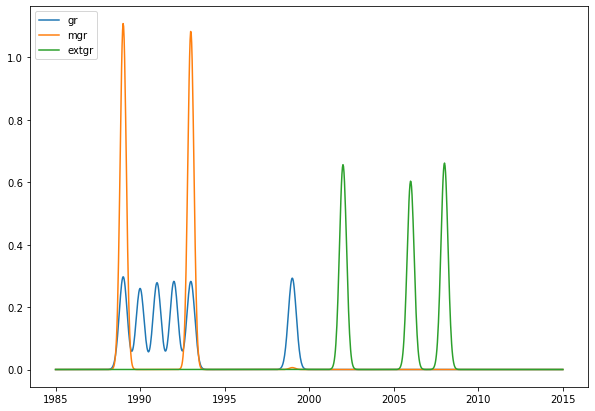

In [11]:
fig, ax = plt.subplots(figsize=(10,7))
for i in range(len(data)):
    labels = ["gr","mgr","extgr"]
    kde = data[i][2]
    year_range = np.linspace(1985, 2015, 1000)
    ax.plot(year_range, kde(year_range),label=labels[i])
    plt.legend(loc=2)